In [53]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd

In [54]:
ejscreen_2021 = 'C:/Users/butle/hp/ejscreen2021_project/data/raw/EJSCREEN_2021_StatePctile.csv'
df = pd.read_csv(ejscreen_2021)


In [55]:
df.head()

,OBJECTID,ID,STATE_NAME,ST_ABBREV,REGION,ACSTOTPOP,MINORPCT,LOWINCPCT,LESSHSPCT,LINGISOPCT,...,T_PTSDF,T_PTSDF_D2,T_OZONE,T_OZONE_D2,T_PM25,T_PM25_D2,T_UST,T_UST_D2,Shape_Length,Shape_Area
0,1,1.001020e+10,Alabama,AL,4,730,0.169863,0.382192,0.207843,0.0,...,0.59 facilities/km distance (58%ile),36%ile,37 ppb (24%ile),52%ile,9.15 ug/m3 (75%ile),51%ile,1.13 facilities/sq km area (63%ile),32%ile,13443.155210,6040789.687
1,2,1.001020e+10,Alabama,AL,4,1263,0.166271,0.212985,0.073801,0.0,...,0.45 facilities/km distance (53%ile),24%ile,37 ppb (24%ile),34%ile,9.15 ug/m3 (75%ile),32%ile,0 facilities/sq km area (5%ile),61%ile,11917.089600,7834159.678
2,3,1.001020e+10,Alabama,AL,4,835,0.680240,0.546599,0.125230,0.0,...,0.65 facilities/km distance (60%ile),80%ile,37 ppb (25%ile),77%ile,9.18 ug/m3 (76%ile),78%ile,0.997 facilities/sq km area (61%ile),78%ile,7770.915121,2900773.822
3,4,1.001020e+10,Alabama,AL,4,1124,0.570285,0.339891,0.162791,0.0,...,0.96 facilities/km distance (69%ile),78%ile,37 ppb (25%ile),70%ile,9.18 ug/m3 (76%ile),70%ile,3.72 facilities/sq km area (86%ile),82%ile,6506.804784,1793331.694
4,5,1.001020e+10,Alabama,AL,4,2774,0.327325,0.214131,0.126368,0.0,...,0.95 facilities/km distance (69%ile),15%ile,37.1 ppb (26%ile),31%ile,9.21 ug/m3 (77%ile),29%ile,0.773 facilities/sq km area (55%ile),21%ile,11070.367850,5461601.630


In [56]:
df.describe()

,OBJECTID,ID,REGION,ACSTOTPOP,MINORPCT,LOWINCPCT,LESSHSPCT,LINGISOPCT,UNDER5PCT,OVER64PCT,...,B_PTRAF_D2,B_PWDIS_D2,B_PNPL_D2,B_PRMP_D2,B_PTSDF_D2,B_OZONE_D2,B_PM25_D2,B_UST_D2,Shape_Length,Shape_Area
count,220333.000000,2.203330e+05,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,...,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,220333.000000,2.203330e+05,2.203330e+05
mean,110167.000000,2.863577e+11,5.167642,1488.729523,0.379880,0.328999,0.127365,0.051343,0.057683,0.169330,...,5.352575,3.835649,5.747328,5.715617,5.709190,5.691217,5.692252,5.849505,2.159649e+04,1.035940e+08
std,63604.802768,1.633201e+11,2.482247,1023.901679,0.318703,0.213851,0.119135,0.110103,0.040588,0.103726,...,3.068080,3.570613,2.760908,2.812929,2.809573,2.694286,2.697616,2.903248,6.339577e+04,3.809274e+09
min,1.000000,1.001020e+10,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.015633e+02,5.494842e+03
25%,55084.000000,1.312100e+11,3.000000,887.000000,0.101504,0.157005,0.040906,0.000000,0.028949,0.100849,...,3.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.161918e+03,8.056294e+05
50%,110167.000000,2.816400e+11,5.000000,1266.000000,0.284227,0.294545,0.092697,0.000000,0.052587,0.154450,...,5.000000,3.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.462489e+03,2.223483e+06
75%,165250.000000,4.200340e+11,7.000000,1822.000000,0.628221,0.468776,0.178309,0.053134,0.079669,0.216418,...,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2.034583e+04,1.521928e+07
max,220333.000000,7.215380e+11,10.000000,59947.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,8.214219e+06,1.289560e+12


In [61]:
ejscreen_2021_columns = 'C:/Users/butle/hp/ejscreen2021_project/data/raw/2021_EJSCREEEN_columns-explained.xlsx'
columns = pd.read_excel(ejscreen_2021_columns)

In [67]:
df.shape

(220333, 136)

In [65]:
afile = "C:/Users/butle/hp/ejscreen2021_project/data/raw/EJSCREEN_2021_USPR.gdb"
df2 = gpd.read_file(afile)

<AxesSubplot:>

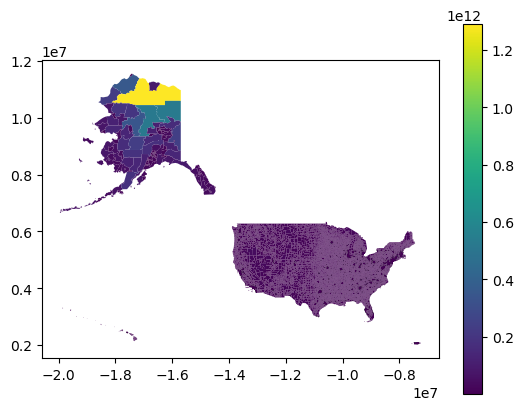

In [69]:
df2.plot("Shape_Area", legend=True)

In [70]:
df.shape


(220333, 136)

In [71]:
df.columns

Index(['OBJECTID', 'ID', 'STATE_NAME', 'ST_ABBREV', 'REGION', 'ACSTOTPOP',
       'MINORPCT', 'LOWINCPCT', 'LESSHSPCT', 'LINGISOPCT',
       ...
       'T_PTSDF', 'T_PTSDF_D2', 'T_OZONE', 'T_OZONE_D2', 'T_PM25', 'T_PM25_D2',
       'T_UST', 'T_UST_D2', 'Shape_Length', 'Shape_Area'],
      dtype='object', length=136)

In [74]:
df2.plot("D_RESP_2", legend=True)

MemoryError: Unable to allocate 82.4 MiB for an array with shape (49, 220333) and data type int64